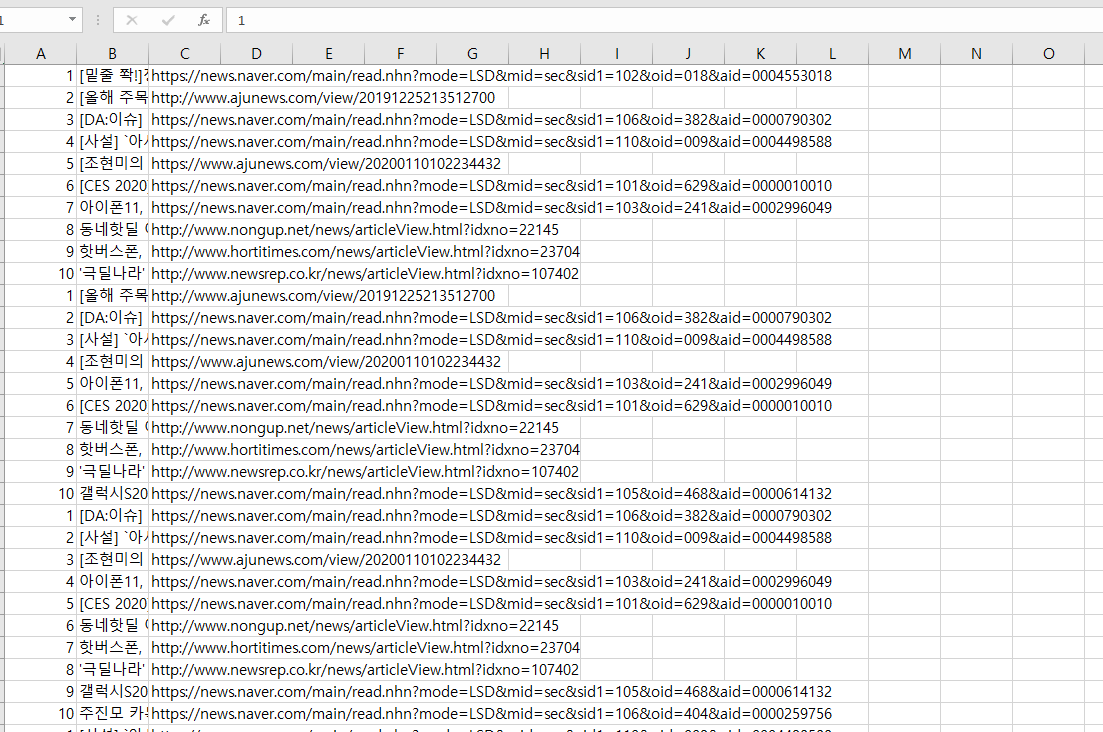

In [41]:
from IPython.display import Image
Image(filename='Cap 2020-01-10 22-18-13-846.png') 

In [39]:
import requests
import openpyxl
import pprint
import urllib.request

client_id = 'hello!'
client_secret = 'hello!'

start = 1
num = 0

excel_file = openpyxl.Workbook()
excel_sheet = excel_file.active
encText = urllib.parse.quote("삼성전자") #원하는 검색어를 넣으세요
display = ("10") #원하는 기사의 숫자


for index in range(10):
    start_number = start + (index + 100)
    naver_open_api = 'https://openapi.naver.com/v1/search/news.json?query=' + encText + '&display='+ display+ '&start='+ str(start_number) 
    header_params = {'X-Naver-Client-ID':client_id, "X-Naver-Client-Secret":client_secret}
    res = requests.get(naver_open_api, headers = header_params)

    if res.status_code == 200:
        data = res.json()
        for num, item in enumerate(data['items']):
            num = num + 1
            excel_sheet.append([num, item['title'], item['link']])
        
    else:
        print("Error Code:", res.status_code)

excel_file.save('samsung.xlsx')
excel_file.close()